In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv("titanic.csv")      
print(titanic_data.head(5) ) 


                                              name  pclass  survived  gender  \
0                    Allen, Miss. Elisabeth Walton       1         1  female   
1                   Allison, Master. Hudson Trevor       1         1    male   
2                     Allison, Miss. Helen Loraine       1         0  female   
3             Allison, Mr. Hudson Joshua Creighton       1         0    male   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)       1         0  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [7]:

# Додавання нового рядка з використанням loc
new_row = {
    'name': 'Reinhardt Vladyslav', 
    'pclass': 1, 
    'survived': 1, 
    'gender': 'male',
    'age': 20, 
    'sibSp': 0, 
    'parch': 0, 
    'ticket': 1111111, 
    'fare': 200.25, 
    'cabin': 'C22 C25', 
    'embarked': 'S',
    'boat': 1,
    'body': 60,
    'home.dest': 'Montreal, PQ / Chesterville, ON'
}

# Використовуємо loc для додавання рядка
titanic_data.loc[len(titanic_data)] = new_row

# Перевіряємо останні 5 рядків, щоб переконатися, що новий рядок додано
print(titanic_data.tail(5))


                           name  pclass  survived  gender   age  sibsp  parch  \
1305      Zabour, Miss. Thamine       3         0  female   NaN    1.0      0   
1306  Zakarian, Mr. Mapriededer       3         0    male  26.5    0.0      0   
1307        Zakarian, Mr. Ortin       3         0    male  27.0    0.0      0   
1308         Zimmerman, Mr. Leo       3         0    male  29.0    0.0      0   
1309        Reinhardt Vladyslav       1         1    male  20.0    NaN      0   

       ticket      fare    cabin embarked boat   body  \
1305     2665   14.4542      NaN        C  NaN    NaN   
1306     2656    7.2250      NaN        C  NaN  304.0   
1307     2670    7.2250      NaN        C  NaN    NaN   
1308   315082    7.8750      NaN        S  NaN    NaN   
1309  1111111  200.2500  C22 C25        S    1   60.0   

                            home.dest  
1305                              NaN  
1306                              NaN  
1307                              NaN  
1308      

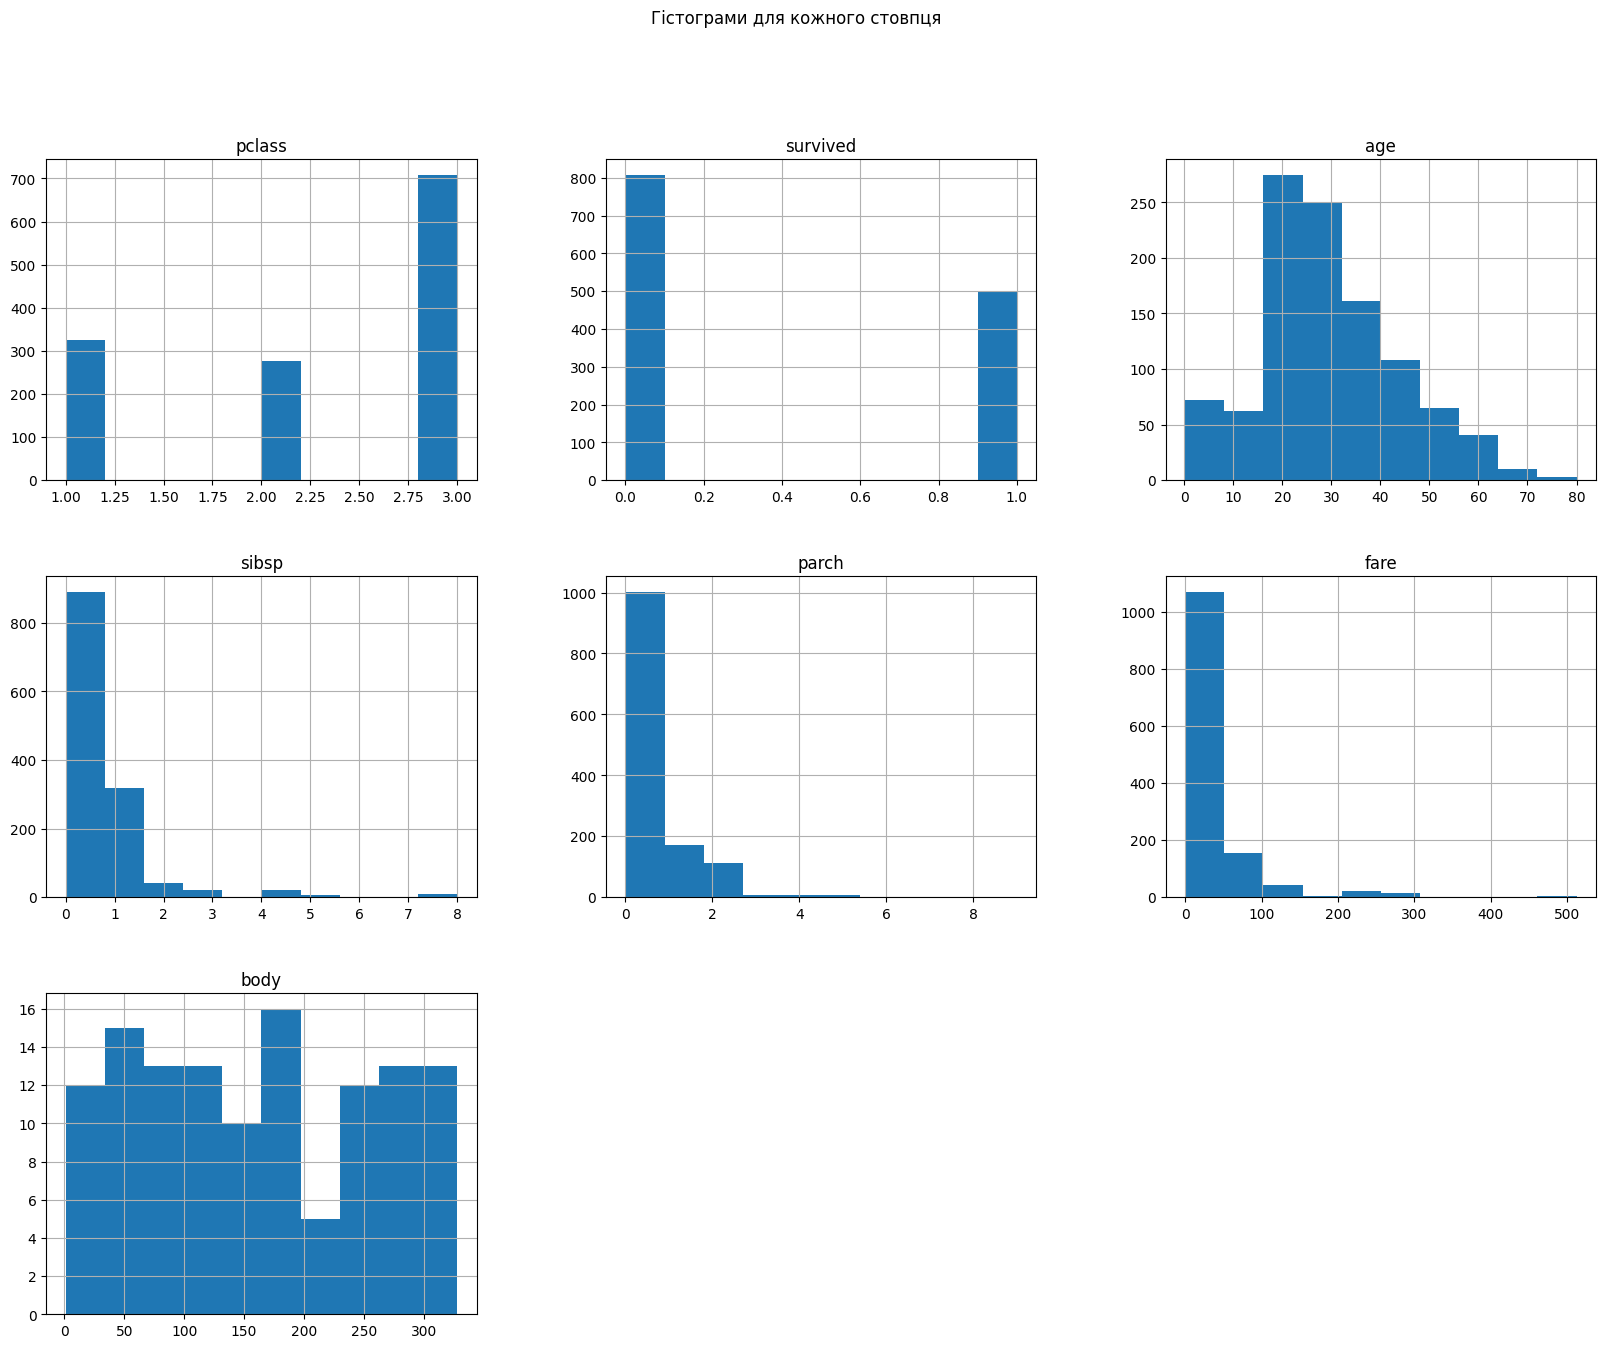

In [8]:

# Побудова гістограм для кожного стовпця
titanic_data.hist(bins=10, figsize=(20, 15))
plt.suptitle("Гістограми для кожного стовпця")
plt.show()


In [9]:
# Кількість пасажирів у кожному класі
passenger_count_by_class = titanic_data['pclass'].value_counts()
print("Кількість пасажирів у кожному класі:\n", passenger_count_by_class)


Кількість пасажирів у кожному класі:
 pclass
3    709
1    324
2    277
Name: count, dtype: int64


In [10]:
# Відсоток пасажирів, що вижили
survived_percentage = titanic_data['survived'].mean() * 100
print(f"Відсоток пасажирів, що вижили: {survived_percentage:.2f}%")


Відсоток пасажирів, що вижили: 38.24%


In [11]:
# Середній вік пасажирів (ігноруємо відсутні значення)
average_age = titanic_data['age'].mean()
print(f"Середній вік пасажирів: {average_age:.2f} років")


Середній вік пасажирів: 29.87 років


In [18]:
# Фільтрація пасажирів за прізвищем, яке починається з певної літери (наприклад, 'R')
titanic_data['surname'] = titanic_data['name'].str.split(',').str[0]

# Фільтруємо пасажирів за літерою 'R' і виводимо перші 7 записів
filtered_passengers = titanic_data[titanic_data['surname'].str.startswith('R')].head(7)
print(filtered_passengers)


                                                  name  pclass  survived  \
234                    Reuchlin, Jonkheer. John George       1         0   
235                Rheims, Mr. George Alexander Lucien       1         1   
236                                Ringhini, Mr. Sante       1         0   
237                                Robbins, Mr. Victor       1         0   
238  Robert, Mrs. Edward Scott (Elisabeth Walton Mc...       1         1   
239               Roebling, Mr. Washington Augustus II       1         0   
240      Romaine, Mr. Charles Hallace ("Mr C Rolmane")       1         1   

     gender   age  sibsp  parch    ticket      fare cabin embarked boat  \
234    male  38.0      0      0     19972    0.0000   NaN        S  NaN   
235    male   NaN      0      0  PC 17607   39.6000   NaN        S    A   
236    male  22.0      0      0  PC 17760  135.6333   NaN        C  NaN   
237    male   NaN      0      0  PC 17757  227.5250   NaN        C  NaN   
238  female  43.

In [24]:
# Обробка пропущених значень у стовпці 'age'
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

# Нормалізація стовпця 'age'
titanic_data['age_normalized'] = (titanic_data['age'] - titanic_data['age'].min()) / (titanic_data['age'].max() - titanic_data['age'].min())

# Заокруглення до двох знаків після коми
titanic_data['age_normalized'] = titanic_data['age_normalized'].round(2)
titanic_data['age'] = titanic_data['age'].round(2)

# Виведення останніх 5 рядків
print(titanic_data[['age', 'age_normalized']].tail())


        age  age_normalized
1304  14.50            0.18
1305  29.88            0.37
1306  26.50            0.33
1307  27.00            0.34
1308  29.00            0.36
